In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nx=100
xmax=10
xmin=0
x =np.linspace(0,xmax-xmin,Nx)
t =np.linspace(0,100,3000)  # As we decrease dt,we get unstable solution. 
sol =np.zeros((len(t),len(x)))
sol[0,:] =np.sin(3*np.pi*x/xmax-xmin)
c2=1.0
dx=x[1]-x[0]
dt=t[1]-t[0]

alpha=c2*dt*dt/(dx**2)

In [3]:
#setting initial velocity as zero at x=0
#sol[1,:]=sol[0,:]

In [4]:
print(sol.shape)

(3000, 100)


In [5]:
for time in range(1,len(t),1):
    for j in range(1,len(x)-1,1):
        if time==1:
            sol[time][j]=sol[time-1][j]+0.5*alpha*(sol[time-1][j+1]-2.0*sol[time-1][j]+sol[time-1][j-1])
        else:
            sol[time][j]= 2.0*sol[time-1][j]-sol[time-2][j]+alpha*(sol[time-1][j+1]-2.0*sol[time-1][j]+sol[time-1][j-1])

In [6]:
y_ana=np.zeros((len(t),len(x)))
y_ana[0,:]=np.sin(3*np.pi*x/xmax-xmin)
for time in range(1,len(t),1):
    y_ana[time,:]=np.cos(3*np.pi*np.sqrt(c2)*(t[time])/(xmax-xmin))*np.sin(3*np.pi*x/(xmax-xmin))

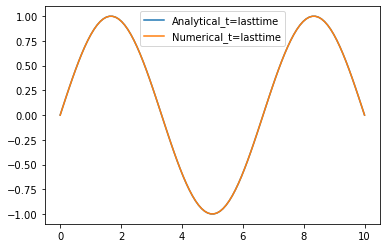

In [7]:
plt.plot(x,y_ana[-1,:],label='Analytical_t=lasttime')
plt.plot(x,sol[-1,:],label='Numerical_t=lasttime')
plt.legend(loc='best')

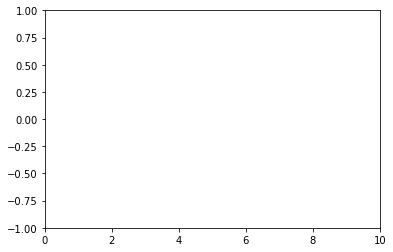

In [8]:
import matplotlib.animation as animation
from IPython import display

#initializing a figure
fig=plt.figure()

# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, 10),  ylim=(-1.0, 1.0))
  
# initializing a line variable
line, = axis.plot([], [], lw=3)
line1, = axis.plot([], [], lw=3)

In [9]:
def animate(frame_number):
    line.set_data(x, y_ana[frame_number,:])
    line.set_color('blue')
    line1.set_data(x, sol[frame_number,:])
    line1.set_color('green')
    return line,line1

In [10]:
anim = animation.FuncAnimation(fig, animate, frames=len(t),
                               interval=20, blit=True)
fig.suptitle('Wave_equation', fontsize=14)

Text(0.5, 0.98, 'Wave_equation')

In [11]:
#pip install ffmpeg-python

In [12]:


# converting to an html5 video
video = anim.to_html5_video()
 
# embedding for the video
html = display.HTML(video)
 
# draw the animation
display.display(html)
plt.close()